In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

0.1 0.865786081664 0.860111590429
0.2 0.743081052349 0.746860987596
0.3 0.617960440702 0.620663074211
0.4 0.509113325433 0.507902602529
0.5 0.409701869365 0.411632609706
0.6 0.312853436985 0.312848152227
0.7 0.221422303157 0.222739775734
0.9 0.0653583068225 0.0657408463143


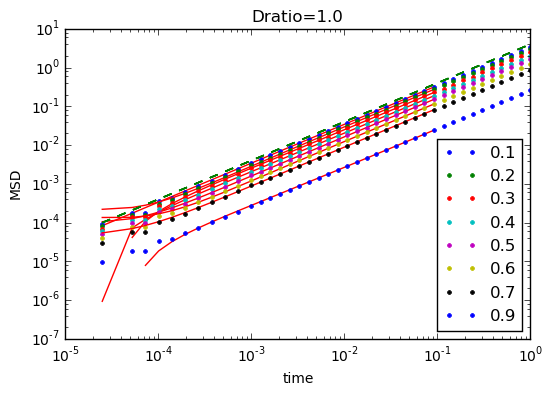

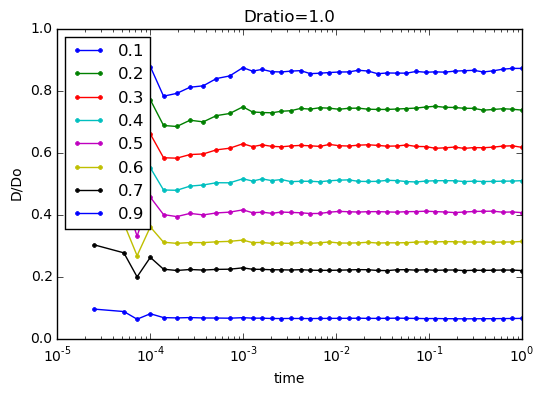

In [146]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

def msdf(t,A,B,D):
    tt=np.array(t)
    return 4*D*tt+A+B*np.log(tt)
    
def plotmsd(phi):
    #dat = np.loadtxt('data/2Dcrowding_LS_mobilecrowder_phi'+str(phi)+'rv=1.496rm.csv',delimiter=',')   
    #dat = np.loadtxt('data/2Dcrowding_LS_mobilecrowder_phi'+str(phi)+'.csv',delimiter=',')   
    dat = np.loadtxt('data/2DLS_mob_Dratio'+str(Dratio)+'phi'+str(phi)+'.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    c1,c2 = curve_fit(msdf,t[t<1e-1][1:],msd[t<1e-1][1:])
    ax1.plot(t[t<1e-1][1:],msdf(t[t<1e-1][1:],c1[0],c1[1],c1[2]),'r')
    ax1.loglog(t,msd,'.',label=str(phi))
    ax1.plot(t,4*t,'g--')
    ax1.set_title('Dratio='+str(Dratio))
    Dt = msd[1:]/t[1:]/4.
    #Dt = Dt - Dt[0]+1
    ax2.semilogx(t[1:],Dt,'.-',label=str(phi))
    ax2.set_title('Dratio='+str(Dratio))
    deff = Dt[(t>1e-1)[1::]]
    print phi,np.mean(deff),c1[2]
    return np.mean(deff)#,c1[2]

de = []
#phits = [0.1,0.3,0.5,0.7,0.9]
phits = [0.1,.2,0.3,.4,0.5,.6,0.7,0.9]
Dratio = 1.
dfits=[]
for p in phits:
    mean = plotmsd(p)
    dfits.append(dfit)
    #print mean
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.01
    ymax = 1.2
    #ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  
#print 'dfits',dfits

deff 0.410003712077
deff 0.408207385601
deff 0.406408978444
deff 0.406665395659
deff 0.405284760971


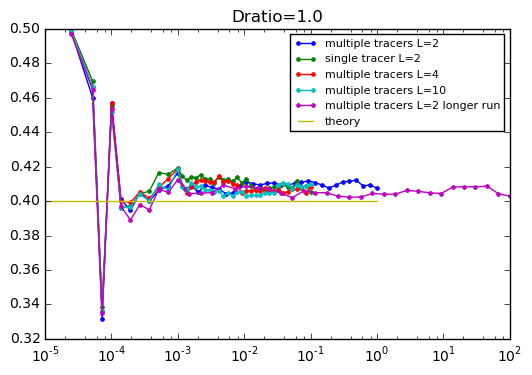

In [9]:
f2,ax2 = plt.subplots(1)
Dratio = 1.
phi=0.5
labels = ['multiple tracers L=2','single tracer L=2','multiple tracers L=4','multiple tracers L=10','multiple tracers L=2 longer run']
dat1 = np.loadtxt('data/2DLS_mob_Dratio'+str(Dratio)+'phi'+str(phi)+'.csv',delimiter=',')   
dat2 = np.loadtxt('data/2DLS_mob_Dratiotest'+str(Dratio)+'phi'+str(phi)+'.csv',delimiter=',')
dat3 = np.loadtxt('data/2DLS_mob_Dratiotest'+str(Dratio)+'phi'+str(phi)+'N200.csv',delimiter=',')
dat4 = np.loadtxt('data/2DLS_mob_Dratiotest'+str(Dratio)+'phi'+str(phi)+'N200L10.csv',delimiter=',')
dat5 = np.loadtxt('data/2DLS_mob_Dratiotest'+str(Dratio)+'phi'+str(phi)+'N200tend2.csv',delimiter=',')
for i,dat in enumerate([dat1,dat2,dat3,dat4,dat5]):
    msd = dat[:,1]
    t = dat[:,0]
    Dt = msd[1:]/t[1:]/4.
    #Dt = Dt - Dt[0]+1
    ax2.semilogx(t[1:],Dt,'.-',label=labels[i])
    ax2.set_title('Dratio='+str(Dratio))
    deff = Dt[(t>1e-2)[1::]]
    print 'deff',np.mean(deff)
ax2.semilogx(np.logspace(-5,0,100),[0.4]*len(np.logspace(-5,0,100)),'-',label='theory')
ax2.legend(loc='best',fontsize=8)
f2.savefig("figure/2DLS_moc_Deff_t_Dratio"+str(Dratio)+"Ntcomparison.png",format='png',dpi=100)

In [64]:
f1.savefig("figure/2DLS_moc_MSD_t_Dratio"+str(Dratio)+".png",format='png',dpi=100)    
f2.savefig("figure/2DLS_moc_Deff_t_Dratio"+str(Dratio)+".png",format='png',dpi=100)

phi [0.1, 0.3, 0.5, 0.7, 0.9]
Deff [0.90893652677402414, 0.70139560593806205, 0.50351276151390012, 0.2793141679474756, 0.095549370237382872]


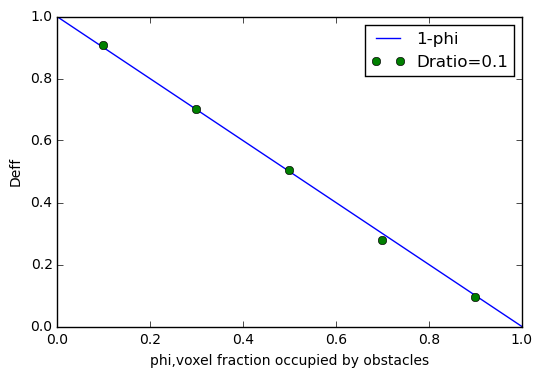

In [9]:
#phir = [0.,0.0906,0.1813,0.272,0.3627]
#phir = [0.0,0.1,0.2,0.3,0.4,0.45]
from scipy.optimize import curve_fit
def lin(x,m,c):
    return m*x+c 

def model(phis):
    alpha = 0.282
    fo=(1-alpha)/(1+alpha)
    D = [((phi*phi+(4.*fo*fo*(1-phi)))**0.5 - phi)/2./fo for phi in phis]
    return D

c1,c2 = curve_fit(lin,phits,de)
xx = np.linspace(0,1.,20)
plt.plot(xx,[1.-x for x in xx],'-',label='1-phi')
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
plt.plot(phits,de,'o',label='Dratio='+str(Dratio))
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,1)
plt.ylim(0.0,1)
plt.legend(loc='best')
print 'phi',phits
print 'Deff',de
#plt.savefig("figure/2DLS_mobileCrowders_Deff_phi.png",format='png',dpi=100)

phi [0.1, 0.3, 0.5, 0.7, 0.9]
Deff [0.84518182010277787, 0.58371259991098134, 0.3666417627389329, 0.18804326903565613, 0.049086233531384325]


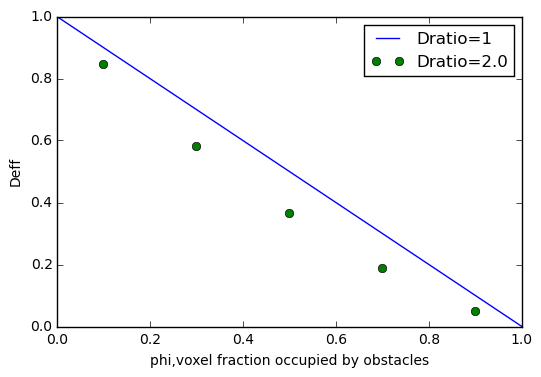

In [17]:
from scipy.optimize import curve_fit
def lin(x,m,c):
    return m*x+c 

def model(phis):
    alpha = 0.282
    fo=(1-alpha)/(1+alpha)
    D = [((phi*phi+(4.*fo*fo*(1-phi)))**0.5 - phi)/2./fo for phi in phis]
    return D

#c1,c2 = curve_fit(lin,phits,de)
xx = np.linspace(0,1.,20)
plt.plot(xx,[1.-x for x in xx],'-',label='Dratio=1')
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
plt.plot(phits,de,'o',label='Dratio=2.0')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,1)
plt.ylim(0.0,1)
plt.legend(loc='best')
print 'phi',phits
print 'Deff',de
#plt.savefig("figure/2DLS_mobileCrowders_Deff_phi.png",format='png',dpi=100)

/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars


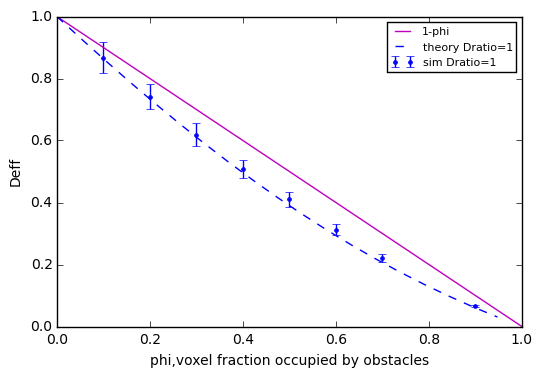

In [15]:
phi =     [0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,  0.9]
Deffdr1 = [0.86747145806848147, 0.74097681476545685, 0.61851106885679674, 0.50862197898378592, 0.40992210907188997, 0.31262770674320861, 0.22125242725659167, 0.065364112848769695]
std1 = [0.049142443574030366, 0.040703810621174688, 0.036775013630502812, 0.028396069066277844, 0.022907502692156367, 0.017054941843189016, 0.013553458624488169, 0.0036723923377878316]
Deffdr2 = [0.85319029810440894, 0.72283995180998417, 0.58588010424518544, 0.47781471605600195, 0.36620479849166804, 0.2710701744024272, 0.18578182255484946, 0.04970904972640109]
std2 = [0.052626560129530431, 0.04038461497468436, 0.02750402640022458, 0.025866619627462832, 0.017128627804426689, 0.015515136126742988, 0.0098861878261673076, 0.0026249963328859515]
phi2 =     [0.1, 0.3,   0.5,   0.7,  0.9]
#Deffold = [0.88194789790445383, 0.65646784116270185, 0.42688326325399356, 0.24148490738246942, 0.07217469345633859]
Deffdr05 = [0.88324471117971592, 0.67956230319364197, 0.45580586862259859, 0.26251712671331928, 0.081253400782600849]
Deffdr01 = [0.90893652677402414, 0.70139560593806205, 0.50351276151390012, 0.2793141679474756, 0.095549370237382872]
def model(phis,g):
    alpha = 0.282
    fo=(1-alpha)/(1+(alpha*(2*g-1)))
    D = lambda x: (1-x)*(math.sqrt(((1-g)*(1-x)*fo+x)**2 + 4*g*(1-x)*fo*fo)-((1-g)*(1-x)*fo+x))/(2*g*(1-x)*fo)
    return [D(y) for y in phis]

def model2(phis):
    alpha = 0.282
    fo=(1-alpha)/(1+alpha)
    g=1
    D = lambda x: (1-x)*(math.sqrt(((1-g)*(1-x)*fo+x)**2 + 4*g*(1-x)*fo*fo)-((1-g)*(1-x)*fo+x))/(2*g*(1-x)*fo)
    return [D(y/0.82) for y in phis]    

xx = np.linspace(0,1.,20)
plt.plot(xx,[1.-x for x in xx],'m-',label='1-phi')
plt.plot(xx,model(xx,1.0),'b--',label='theory Dratio=1')
#plt.plot(xx,model(xx,2.0),'r--',label='theory Dratio=2')
#plt.plot(xx,model(xx,0.1),'c--',label='theory Dratio=0.1')
#plt.plot(phi,Deffdr1,'bo',label='Dratio=1.0')
plt.errorbar(phi,Deffdr1,yerr=std1,fmt='b.',label='sim Dratio=1')
#plt.errorbar(phi,Deffdr2,yerr=std2,fmt='r.',label='sim Dratio=2')
#plt.plot(phits,dfits,'x',label='Dfit')
#plt.plot(phi2,Deffdr01,'c.',label='Dratio=0.1')
#plt.plot(xx,model(xx,0.5),'g--',label='theory Dratio=0.5')
#plt.plot(phi,Deffdr05,'go',label='Dratio=0.5')

#plt.plot(phi,Deffdr2,'ro',label='Dratio=2.0')



#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
#plt.plot(phi,Deffold,'co',label='first result')
#print model([0.5],1.)
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,1)
#plt.ylim(0.0,1)
plt.legend(loc='best',fontsize=8)
plt.savefig("figure/2DLS_moc_Deffvsphi_theorySim_Dratio1.png",format='png',dpi=100)

In [12]:
model([0.5],1.)

[0.38983529318078874]

In [36]:
(1-x)*(math.sqrt(((1-g)*(1-x)*fo+x)**2 + 4*g*(1-x)*fo*fo)-((1-g)*(1-x)*fo+x))/(2*g*(1-x)*fo)

1.0


In [84]:
1./0.1

10.0